# Mean and standard deviation

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

#### Argue that these formulas indeed describe a discrete distribution.


$\sum _{n=1}^{\infty }\:\frac{1}{4n\left(n+1\right)}=\frac{1}{4} \sum \:_{n=1}^{\infty \:}\frac{1}{n\left(n+1\right)}$

Since by telescopic expansion $\sum \:_{n=1}^{\infty \:}\frac{1}{n\left(n+1\right)}$ converges to 1 and the  probability for $k \neq 0$ is equal to 1/2, the probability for all k adds up to 1. This implies that X is a random variable

####  Show that $X$ does not have a mean.

If we try to calculate the mean for k > 0 we will get the following $\sum \:_{n=1}^{\infty \:\:}\frac{n}{4n\left(n+1\right)}$ which does not converge to a number. 


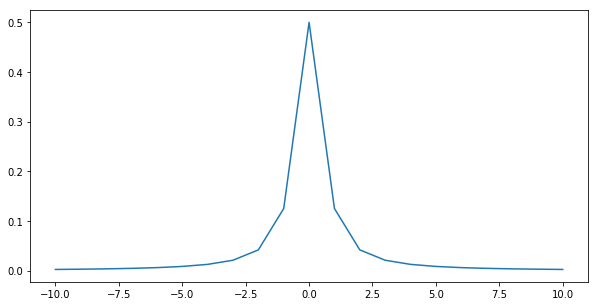

In [25]:
import numpy as np
X = np.array(range(-10, 11))
absX = np.abs(X)
absX[10] = 1
Y = 1/(4*absX*(absX+1))
Y[10] = 1/2
plt.plot(X, Y)


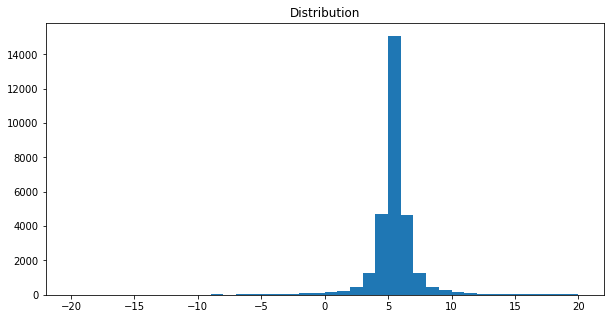

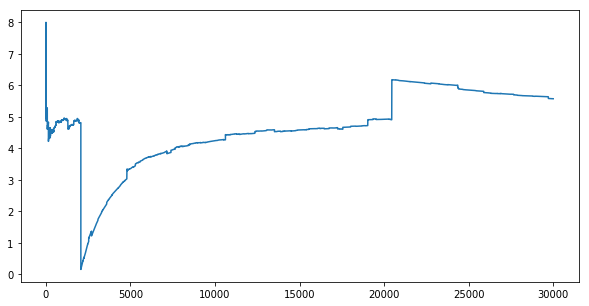

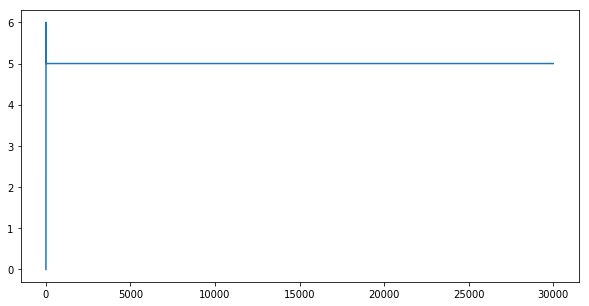

In [171]:
def gen_X(size=10000, c=0):
    
    z = np.zeros(size)
    r = np.random.rand(size) * 4
    for i in range(0, size):
        if (r[i] < 2):
            pass
        else:
            z[i] = np.ceil(1/(1-4*np.abs(3-r[i]))-1)
            if (r[i] < 3):
                z[i] = -z[i]
    return z+c


def x_prefix_median(d):
    ans = np.zeros(len(d))
    for i in range(1, len(d)):
        ans[i] = np.median(d[:i])
    return ans
        

def x_prefix_mean(d):
    indicies=1+np.array(range(len(d)))
    pref_sum = np.cumsum(d)
    return pref_sum / indicies

data =gen_X(30000, 5)
plt.hist(data, bins = [x for x in range(-20, 21)]) 
plt.title("Distribution") 
plt.show()
plt.plot(x_prefix_mean(data))
plt.show()
plt.plot(x_prefix_median(data))
plt.show()
